<a href="https://colab.research.google.com/github/Nojaakto/Nojaakto/blob/main/04_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wstęp Do Multimediów - Lab. 4

Filip Pawłowski

Numer obrazu: 310867 % 36 = **7**

Wykorzystano Google Drive zgodnie z przykładem przygotowawczym.

Pliki znajdują się w */content/drive/My Drive/Colab Notebooks/PMUT_cwiczenia/*

In [ ]:
!pip install table2md
import numpy as np
import cv2
import matplotlib.pyplot as plt
from table2md import MarkdownTable

Montowanie na dysku

In [ ]:
##### dane na Google Drive
from google.colab import drive
drive.mount("/content/drive")
data_dir = "/content/drive/My Drive/Colab Notebooks/PMUT_cwiczenia/"



Mounted at /content/drive


In [11]:

def subplot_print(img, title, nrows, ncols, index, small_title=False):
    """
    Wyswietla obraz, ktory jest w uint8 w BGR, jako subplot.
     """
    subplot = plt.subplot(nrows, ncols, index)
    subplot.set_title(title, {"fontsize": "6"} if small_title else {})
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(img[...,::-1], vmin=0, vmax=255)  # swap BGR to RGB
    
def image_col_read(file_name):
    """
    Czytanie obrazu w kolorze przy uzyciu cv2
    """ 
    return cv2.imread(data_dir + file_name, cv2.IMREAD_COLOR)

def psnr_calc(base_image, changed_image):
    """
    Obliczenie PSNR.
    Zakres wartosci w obrazie od 0 do 255 - przechowywane w uint8.
    """
    return 10 * np.log10(255 * 255 / (np.square(base_image.astype("f") - changed_image.astype("f")).sum() / base_image.size))


## Filtracja

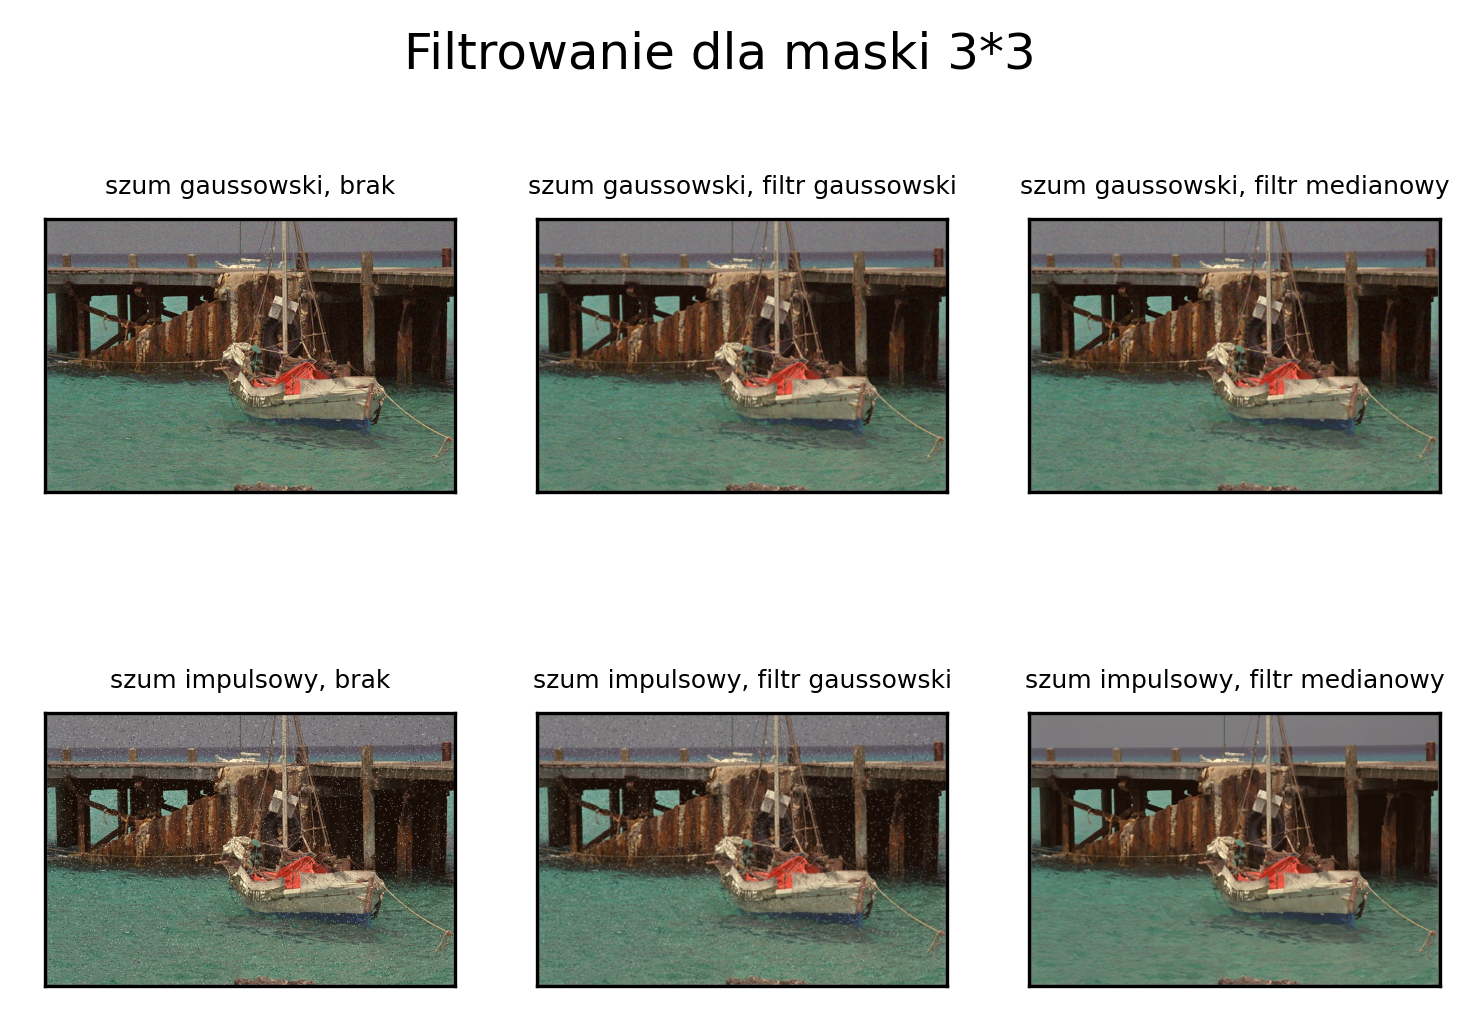

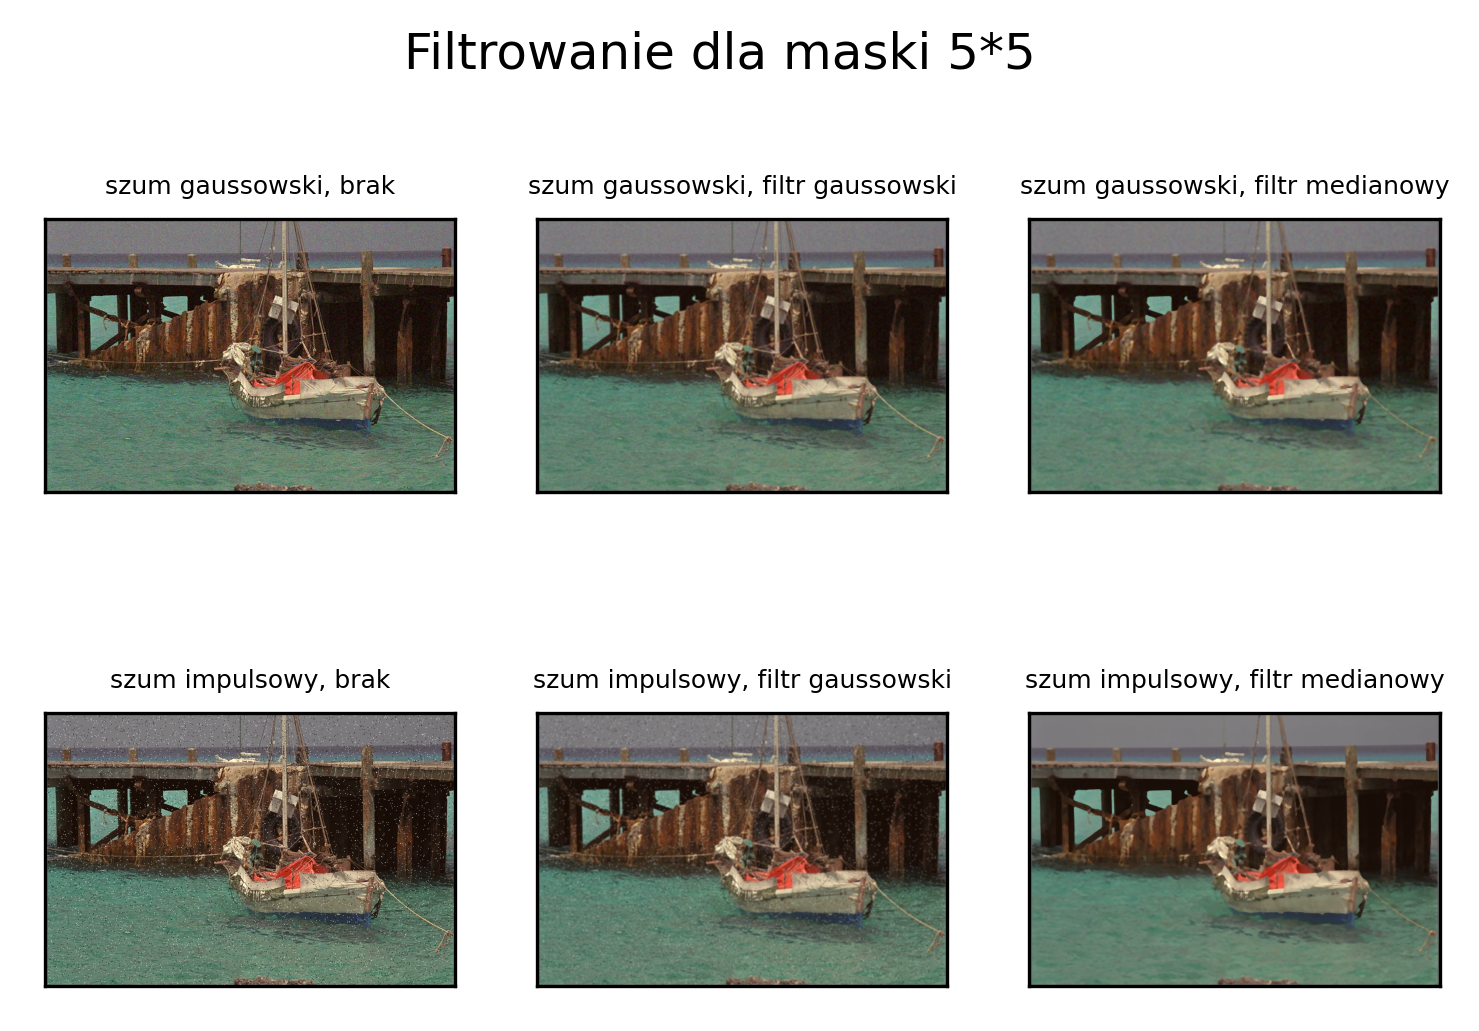

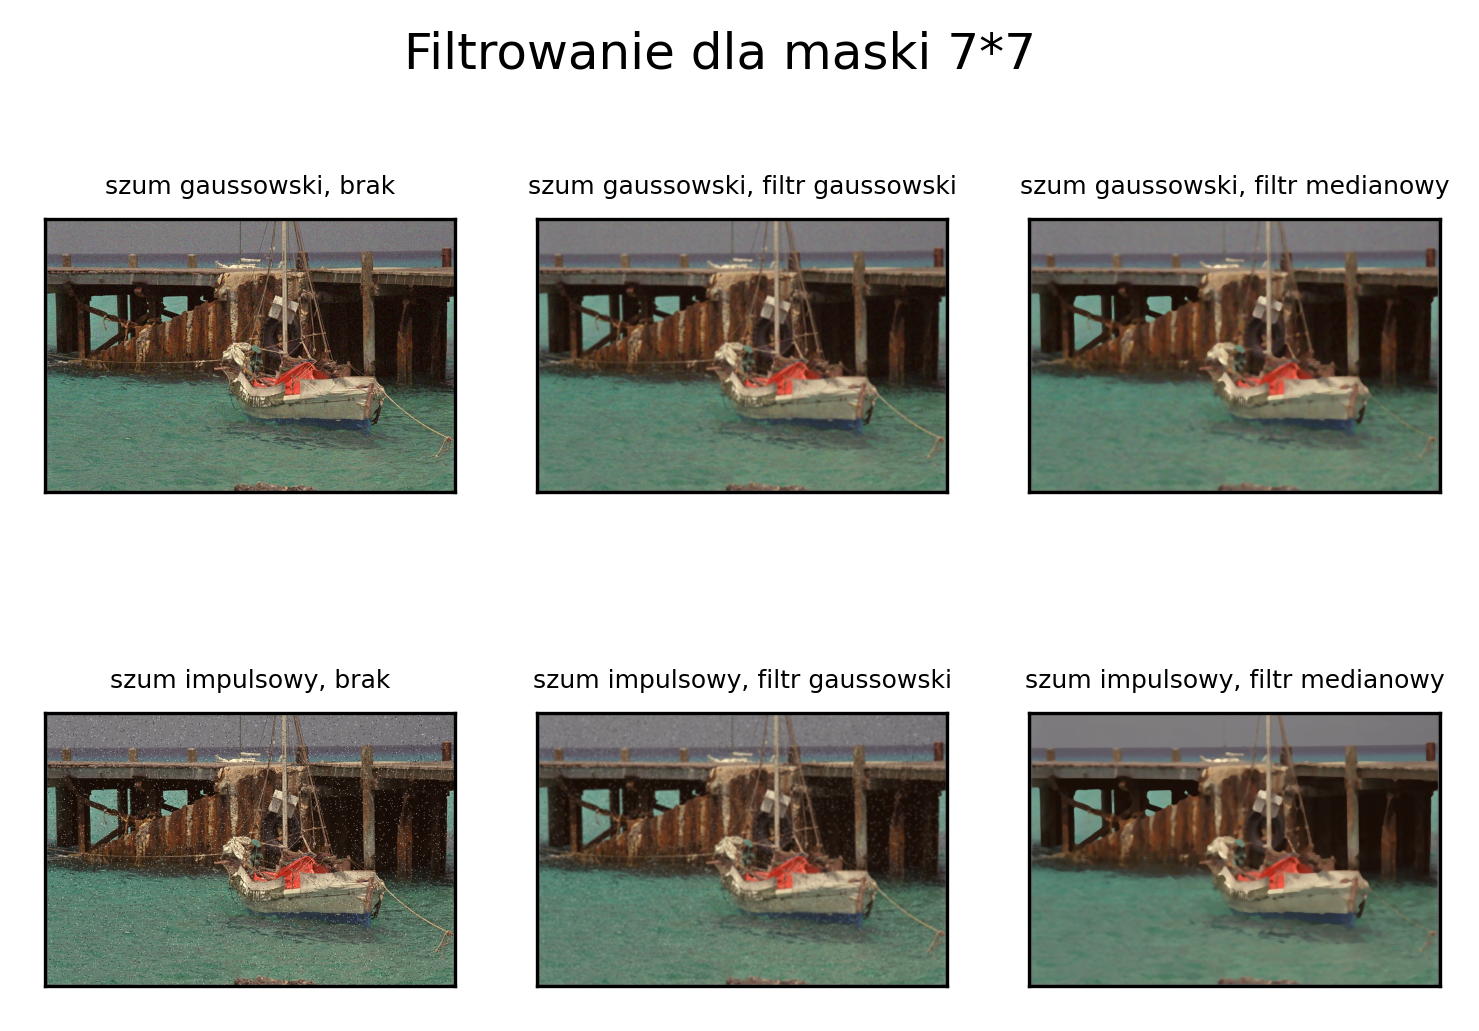

|  obraz źródłowy |      filtr       | rozmiar maski |   psnr  |
|-----------------|------------------|---------------|---------|
| szum gaussowski | brak             | 3             | 26.1633 |
| szum gaussowski | filtr gaussowski | 3             | 29.1914 |
| szum gaussowski | filtr medianowy  | 3             | 27.8784 |
| szum impulsowy  | brak             | 3             | 20.9402 |
| szum impulsowy  | filtr gaussowski | 3             | 26.8653 |
| szum impulsowy  | filtr medianowy  | 3             | 29.3939 |
| szum gaussowski | brak             | 5             | 26.1633 |
| szum gaussowski | filtr gaussowski | 5             | 27.8235 |
| szum gaussowski | filtr medianowy  | 5             | 25.8452 |
| szum impulsowy  | brak             | 5             | 20.9402 |
| szum impulsowy  | filtr gaussowski | 5             | 26.7008 |
| szum impulsowy  | filtr medianowy  | 5             | 26.1901 |
| szum gaussowski | brak             | 7             | 26.1633 |
| szum gaussowski | filtr

In [19]:
%matplotlib inline

def gauss_blur (pic, sizeof_mask): 
    return cv2.GaussianBlur(pic, (sizeof_mask, sizeof_mask), 0)

def med_blur (pic, sizeof_mask): 
    return cv2.medianBlur(pic, sizeof_mask)

image_base = image_col_read("boat2_col.png")
image_noise = image_col_read("boat2_col_noise.png")
image_noise1 = image_col_read("boat2_col_inoise1.png")

filters = [ ("brak", lambda pic, _: pic), ("filtr gaussowski", gauss_blur), ("filtr medianowy", med_blur) ]
imgs = [("szum gaussowski", image_noise), ("szum impulsowy", image_noise1),]
pnsr_val_table = []

for sizeof_mask in range (3, 8, 2):
    plt.suptitle(f"Filtrowanie dla maski {sizeof_mask}*{sizeof_mask}")
    for row in range(len(imgs)):
        (noise_img_title, noise_img) = imgs[row]

        for col in range(len(filters)):
            (filter_name, filter_func) = filters[col] 
            img_with_filter = filter_func(noise_img, sizeof_mask)

            subplot_print( img_with_filter,
                noise_img_title + ", " + filter_name,
                len(imgs),
                len(filters),
                len(filters) * row + col + 1,
                small_title=True,
            )

            pnsr_val_table.append({
                "obraz źródłowy": noise_img_title,
                "filtr": filter_name,
                "rozmiar maski": sizeof_mask,
                "psnr": f"{psnr_calc(image_base, img_with_filter):.4f}"
            })

    plt.gcf().set_dpi(300)
    plt.show()

MarkdownTable.from_dicts(pnsr_val_table).print()

### Zestawienie PSNR dla różnych filtrów

|  obraz źródłowy  |      filtr       | rozmiar maski |   psnr  |
|------------------|------------------|---------------|---------|
| szum gaussowski  | brak             | 3             | 26.1633 |
| szum gaussowski  | filtr gaussowski | 3             | 29.1914 |
| szum gaussowski  | filtr medianowy  | 3             | 27.8784 |
| szum impulsowy 1 | brak             | 3             | 20.9402 |
| szum impulsowy 1 | filtr gaussowski | 3             | 26.8653 |
| szum impulsowy 1 | filtr medianowy  | 3             | 29.3939 |
| szum gaussowski  | brak             | 5             | 26.1633 |
| szum gaussowski  | filtr gaussowski | 5             | 27.8235 |
| szum gaussowski  | filtr medianowy  | 5             | 25.8452 |
| szum impulsowy 1 | brak             | 5             | 20.9402 |
| szum impulsowy 1 | filtr gaussowski | 5             | 26.7008 |
| szum impulsowy 1 | filtr medianowy  | 5             | 26.1901 |
| szum gaussowski  | brak             | 7             | 26.1633 |
| szum gaussowski  | filtr gaussowski | 7             | 26.5276 |
| szum gaussowski  | filtr medianowy  | 7             | 24.9851 |
| szum impulsowy 1 | brak             | 7             | 20.9402 |
| szum impulsowy 1 | filtr gaussowski | 7             | 25.9828 |
| szum impulsowy 1 | filtr medianowy  | 7             | 25.1647 |


### Wnioski

Możemy zaobserwować, że filtr Gaussa lepiej radzi sobie z odszumianiem obrazów z
szumem Gaussa, a filtr medianowy lepiej radzi sobie z szumem impulsowym. Jednak to
rozmiar maski bardziej wpływa na jakość odszumiania - im większa maska tym gorsze wyniki
odszumiania - w szczególności widać to przy masce 7x7.

Wskaźnik PSNR nie zawsze odpowiada subiektywnym odczuciom - w szczególności dotyczy to
filtracji Gaussa na szumie impulsowym, gdzie mimo wyższego PSNR nadal widoczne są artefakty na obrazie.

## Wyrównanie histogramu

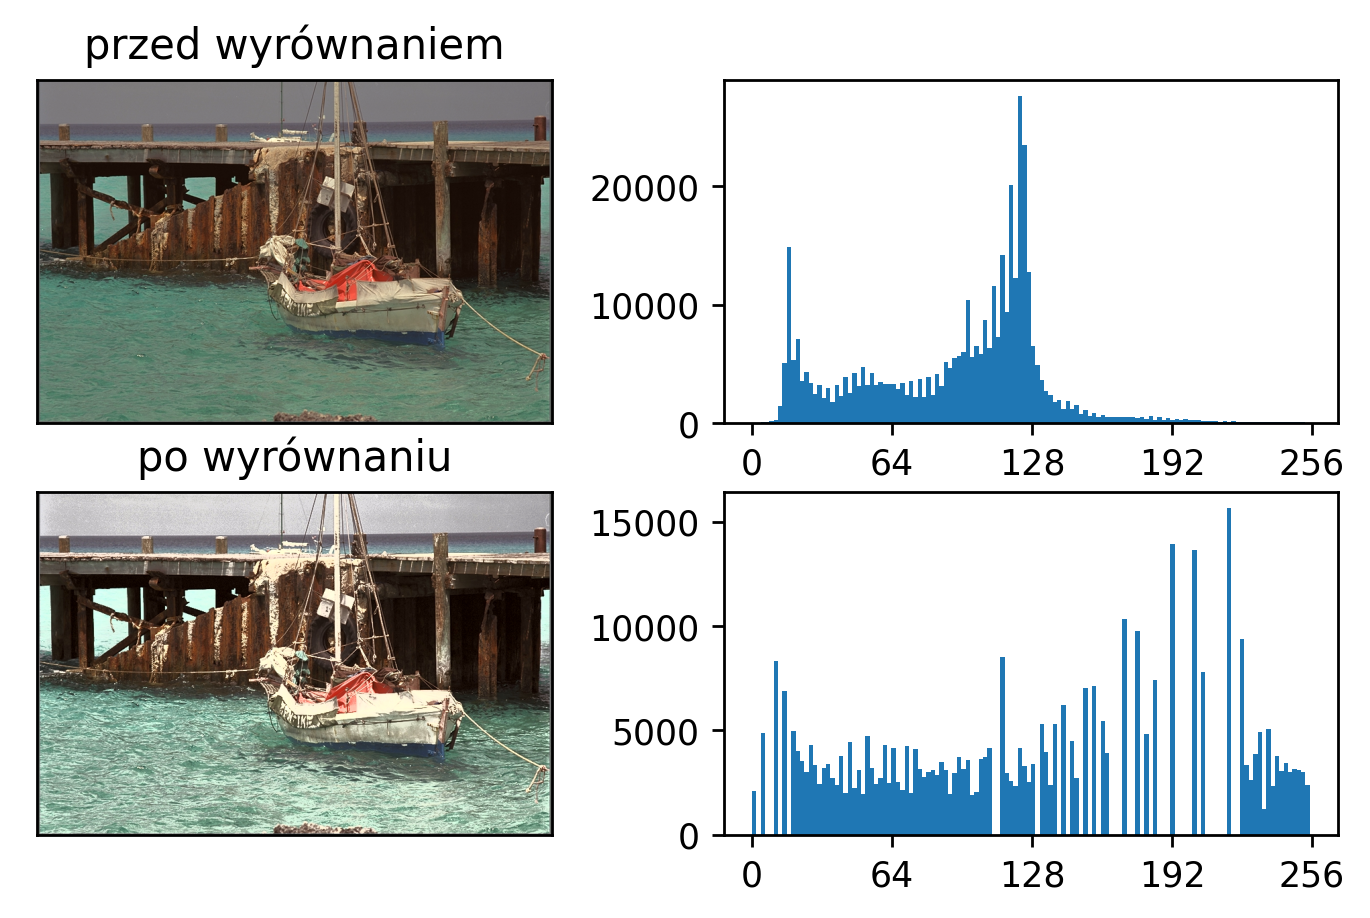

False

In [ ]:
%matplotlib inline

image = image_col_read("boat2_col.png")
image_ycbcr = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

image_equalized_ycbcr = image_ycbcr.copy()
image_equalized_ycbcr[...,0] = cv2.equalizeHist(image_equalized_ycbcr[...,0])
image_equalized = cv2.cvtColor(image_equalized_ycbcr, cv2.COLOR_YCrCb2BGR)

# Porównanie obrazów
subplot_print(image, "przed wyrównaniem", 2, 2, 1)
subplot_print(image_equalized, "po wyrównaniu", 2, 2, 3)

# Porównanie histogtamów
subplot = plt.subplot(2, 2, 2)
subplot.set_xticks(np.arange(0, 257, 64))
subplot.hist(image_ycbcr[...,0].ravel(), bins=128, range=(0, 255))

subplot = plt.subplot(2, 2, 4)
subplot.set_xticks(np.arange(0, 257, 64))
subplot.hist(image_equalized_ycbcr[...,0].ravel(), bins=128, range=(0, 255))

plt.subplots_adjust(left=0)
plt.gcf().set_dpi(250)
plt.show()

# Zapis obrazu do pliku
cv2.imwrite("04_pictures/color_equalized.png", image_equalized)


### Wnioski

Operacja wyrównania histogramu... wyrównała histogram. W szczególności widać to w punktach w jego
prawej części. Przed wyrównaniem w zasadzie nie było punktów o luminancji większej niż 200, a po
wyrównaniu takie punkty stanowią około ⅕ przyjmowanych wartości.

Wyrównanie składowej luminancji wytwarza nienaturalnie prześwietlony obraz. Subiektywnie oceniając
obraz wynikowy - stracił on głębie kolorów.

## Filtr Laplace'a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/content/drive/My Drive/Colab Notebooks/PMUT_cwiczenia/boat2_col.png


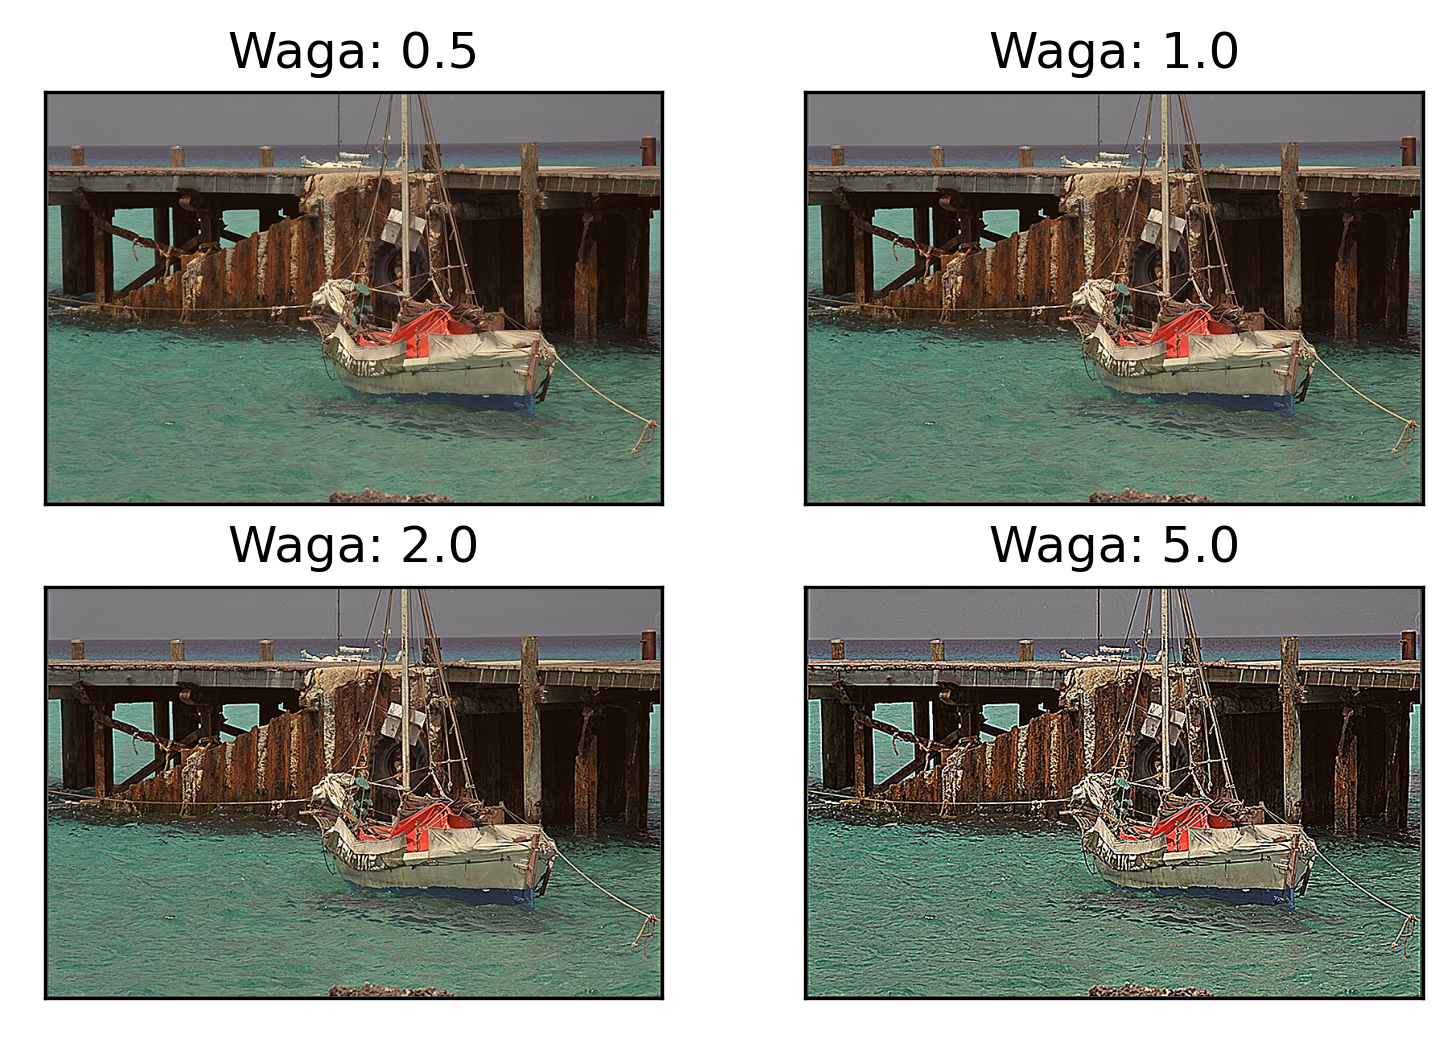

In [ ]:
%matplotlib inline

image = image_col_read("boat2_col.png") / 255.0
image_laplace = cv2.Laplacian(
    cv2.GaussianBlur(image, (3, 3), 0),
    cv2.CV_64F,
)

for idx, weight in enumerate([0.5, 1.0, 2.0, 5.0], start=1):
    image_modified = cv2.addWeighted(image, 1, image_laplace, -weight, 0)
    subplot_print(image_modified, f"Waga: {weight}", 2, 2, idx)

plt.gcf().set_dpi(300)
plt.show()

### Wnioski

> Jaki jest wpływ wagi składowej wysokoczęstotliwościowej na postać obrazu wynikowego?

Im większa waga, tym bardziej uwidocznione są krawędzie obrazu - tym bardziej wydaje się on być
„wyostrzony”.

> Dla jakich wartości tej wagi uzyskuje się dobre, przyjemne dla oka wyniki?

Do wartości około -0.7 wyniki nazwałbym przyjemnymi dla oka. Powyżej tej wartości obraz zaczyna wyglądać nienaturalnie.
W szczególności rzucają się w oczy dwa elementy: wszelkie nierówności na tafli wody są nadto uwidocznione,
a prześwietlenie na czole mężczyzny patrzącego w kierunku fotografa zmienia się w białą plamę.
